In [1]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import numpy as np
import imageio
from glob import glob
import tempfile
import matplotlib.pyplot as plt
import pandas as pd
from subtle.utils.experiment import get_experiment_data
plt.set_cmap('gray')
plt.rcParams['figure.figsize'] = (12, 10)

from tqdm import tqdm_notebook as tqdm

/home/srivathsa/projects/SubtleGad/train/subtle/utils/hyperparameter.py:8: UserWarning: Module test_tube not found - hyperparameter related functions cannot be used
  warnings.warn('Module test_tube not found - hyperparameter related functions cannot be used')


<Figure size 432x288 with 0 Axes>

In [2]:
data = np.load('/home/srivathsa/projects/studies/gad/stanford/preprocess/data_256/Patient_0085.npy')
print(data.shape)

(5, 184, 256, 256)


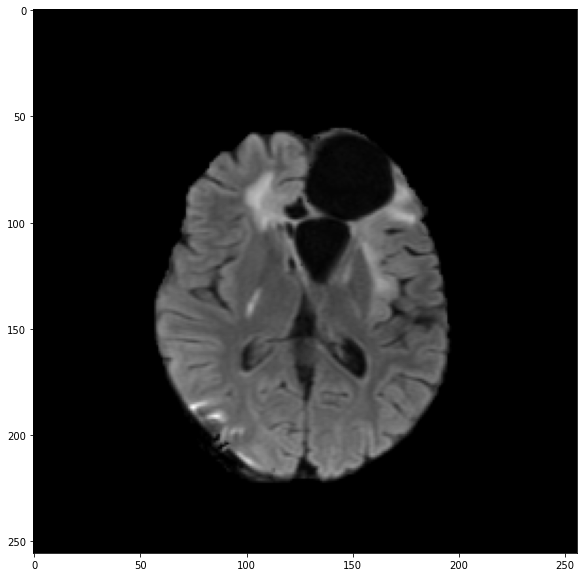

In [7]:
plt.imshow(data[4, 95])

In [24]:
pp_base = '/home/srivathsa/projects/studies/gad/stanford/preprocess/data_256'
cases = sorted([f.split('/')[-1].replace('.npy', '') for f in glob('{}/*.npy'.format(pp_base))])
# cases = sorted([c['Case'] for c in mcon_dict if c['Comments'] == 'pre_low_same'])
cases = sorted([c['Case'] for c in mcon_dict if c['Comments'] == 'reg_mask_failure'])
# cases = ["Patient_0323"]

img_list = []

for cnum in tqdm(cases, total=len(cases)):
    data = np.load('{}/{}.npy'.format(pp_base, cnum))
    sl = data.shape[1] // 2
    
    d0 = np.zeros_like(data[0, sl])
    d1 = data[1, sl] - data[0, sl]
    d2 = data[2, sl] - data[0, sl]
    
    rows = []
    rows.append(np.hstack([d0, d1, d2]))
    rows.append(np.hstack([data[0, sl], data[1, sl], data[2, sl]]))
    rows.append(np.hstack([data[3, sl], data[4, sl], data[5, sl] * data[4].max()]))
    
    fig, axs = plt.subplots(3, squeeze=True)
    for i in np.arange(3):
        axs[i].imshow(rows[i])
        axs[i].axis('off')
    fig.tight_layout(pad=0)
    
    with tempfile.TemporaryDirectory() as tmpdir:
        fpath_plot = '{}/img.png'.format(tmpdir)
        plt.savefig(fpath_plot)
        plt.clf()
        imdata = imageio.imread(fpath_plot)[..., 0]
    
    img_list.append({
        'case_num': cnum,
        'imdata': imdata
    })

/home/srivathsa/miniconda3/envs/py35gad/lib/python3.6/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


  0%|          | 0/4 [00:00<?, ?it/s]

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

In [25]:
@interact
def show_imgs(idx=(0, len(img_list)-1, 1)):
    plt.imshow(img_list[idx]['imdata'])
    plt.title(img_list[idx]['case_num'], fontsize=20)
    plt.axis('off')

interactive(children=(IntSlider(value=1, description='idx', max=3), Output()), _dom_classes=('widget-interact'…

In [23]:
df_multicon = pd.read_csv('multicon_cases.csv')
mcon_dict = df_multicon.to_dict(orient='records')

filt_cases = [c['Case'] for c in mcon_dict if 'reg' in c['Comments']]
filt_cases

['Patient_0345', 'Patient_0371', 'Patient_0398', 'Patient_0562']

In [14]:
fcases = [c['Case'] for c in mcon_dict]

# curr_cases = get_experiment_data('stanford_sri', '/home/srivathsa/projects/SubtleGad/train/configs/experiments')
curr_cases = sorted([f.split('/')[-1].replace('.npy', '') 
                     for f in glob('/home/srivathsa/projects/studies/gad/stanford/preprocess/data_256/*.npy')])

for c in curr_cases:
    if c not in fcases:
        print('rm {}.npy;'.format(c))

rm Patient_0110.npy;
rm Patient_0130.npy;
rm Patient_0276.npy;
rm Patient_0291.npy;
rm Patient_0311.npy;
rm Patient_0322.npy;
rm Patient_0426.npy;


In [16]:
d1 = np.load('/home/srivathsa/projects/studies/gad/stanford/preprocess/data/Patient_0323.npy')
d2 = np.load('/home/srivathsa/projects/studies/gad/stanford/preprocess/data/Patient_0323_T2.npy')
print(d2.shape)


(2, 336, 512, 512)


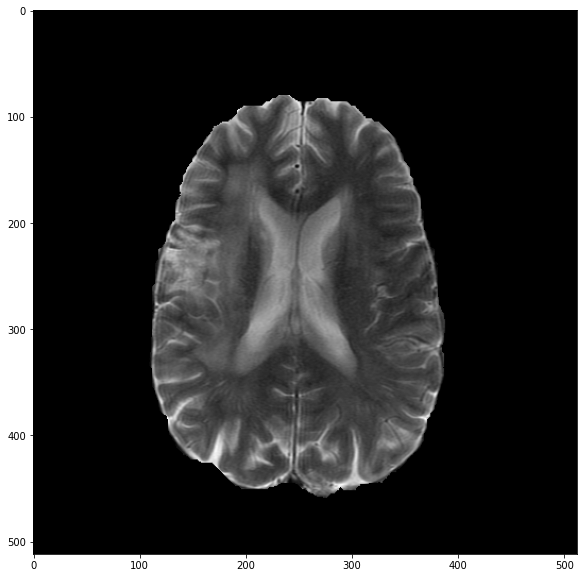

In [19]:
plt.imshow(d2[1, 180])

In [31]:
bpath = '/home/srivathsa/projects/studies/gad/stanford/preprocess/data_256'
cases = sorted([f.split('/')[-1].replace('.npy', '') for f in glob('{}/*.npy'.format(bpath))])

for cnum in tqdm(cases, total=len(cases)):
    case_data = np.load('{}/{}.npy'.format(bpath, cnum))
    uad = case_data[-1]
    
    np.save('{}/uad/{}.npy'.format(bpath, cnum), uad)
    cdata_new = case_data[:-1]
    np.save('{}/{}_nouad.npy'.format(bpath, cnum), cdata_new)

/home/srivathsa/miniconda3/envs/py35gad/lib/python3.6/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/441 [00:00<?, ?it/s]

In [34]:
import os
for cnum in tqdm(cases, total=len(cases)):
    os.rename('{}/{}_nouad.npy'.format(bpath, cnum), '{}/{}.npy'.format(bpath, cnum))

/home/srivathsa/miniconda3/envs/py35gad/lib/python3.6/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/441 [00:00<?, ?it/s]

In [35]:
all_cases = get_experiment_data('stanford_sri', 
                                       dirpath_exp='/home/srivathsa/projects/SubtleGad/train/configs/experiments')

In [40]:
for c in all_cases:
    if c not in cases:
        print(c)

Patient_0489


In [39]:
print(len(all_cases), len(cases))

442 441
